The house price project is an ongoing competition on kaggle. The dataset contains every aspect of residential homes in Ames, Iowa. The objective of the project is to predict the final price of each home. What features of the house has the most variation on the house price? We will investigate feature engineering techniques such Random Forest and Gradient Boosting to find the features that has the most variation on the house price.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Data-Processing

# Here is the run down process for the project.
Clean the data
Split and Test data
Exploratory Data Analysis
Plot Relationship
Feature Engineering
Best Model
Fit Models
Train Predict/ an Score/ on Test
Refining models

# Obtainging the data

In [102]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)



In [103]:
# Reading in the data
house_train_data = pd.read_csv('train.csv')
house_test_data = pd.read_csv('test.csv')
house_sample_data = pd.read_csv('sample_submission.csv')
house_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
house_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [105]:
house_sample_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [106]:
house_train_data['LandSlope'].head(10)

0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
5    Gtl
6    Gtl
7    Gtl
8    Gtl
9    Gtl
Name: LandSlope, dtype: object

In [107]:
house_train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [108]:
# Check the decoration
house_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(house_train_data.shape))
print("The test data size before dropping Id feature is : {} ".format(house_test_data.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [110]:
#Save the 'Id' column
train_ID = house_train_data['Id']
test_ID = house_test_data['Id']

In [111]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
house_train_data.drop("Id", axis = 1, inplace = True)
house_test_data.drop("Id", axis = 1, inplace = True)


In [112]:
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(house_train_data.shape)) 
print("The test data size after dropping Id feature is : {} ".format(house_test_data.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


# Exploring Outliers


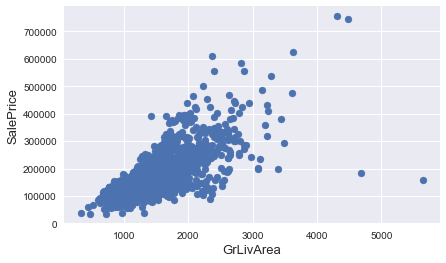

In [113]:
fig, ax = plt.subplots()
ax.scatter(x = house_train_data['GrLivArea'], y = house_train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see that we have some outliers at the bottom right and data points are following the same trend with the other data points. So we will classify those two points as outlier and we will go ahead and delete them.

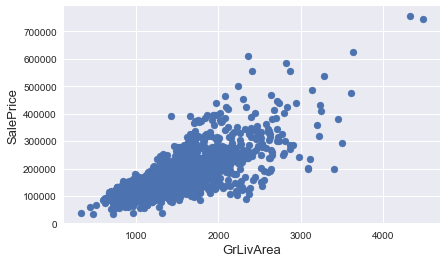

In [114]:
#Deleting outliers
training_data = house_train_data.drop(house_train_data[(house_train_data['GrLivArea']>4000) & (house_train_data['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(training_data['GrLivArea'], training_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Exploring the predictive variable


 mu = 180932.92 and sigma = 79467.79



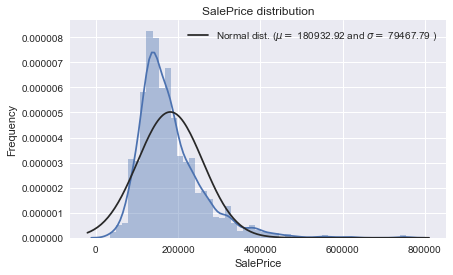

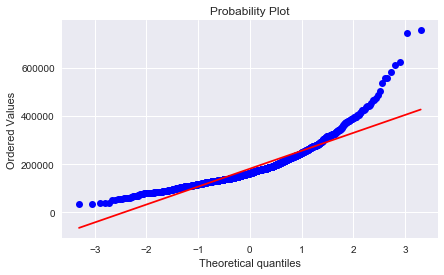

In [115]:
sns.distplot(training_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(training_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)
plt.show()

We see that the predictive variable is deviating from a normal distribution and it has a postive skewness and some peakedness.We also see multiple outliers in the predictive variable. Lets look at skewness and kurtosis.To resolve the skewnwess of the predictive variable we use a log transformation.

In [116]:
print("Skewness: %f" % training_data['SalePrice'].skew())
print("Kurtosis: %f" % training_data['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067



 mu = 12.02 and sigma = 0.40



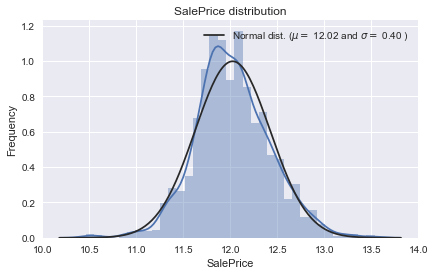

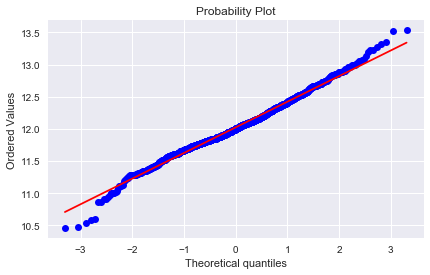

In [117]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
training_data["SalePrice"] = np.log1p(training_data["SalePrice"])

#Check the new distribution 
sns.distplot(training_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(training_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)
plt.show()

# Feature Engineering

In [118]:
# Since we have separate dataset for training and testing. We will combine those two datasets

ntrain = training_data.shape[0]
ntest = house_test_data.shape[0]
Y = training_data.SalePrice.values
entire_data = pd.concat((training_data, house_test_data)).reset_index(drop=True)
entire_data.drop(['SalePrice'], axis=1, inplace=True)
print("entire_data size is : {}".format(entire_data.shape))

entire_data size is : (2917, 79)


In [119]:
# Missing data
entire_data_na = (entire_data.isnull().sum() / len(entire_data)) * 100
entire_data_na = entire_data_na.drop(entire_data_na[entire_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :entire_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


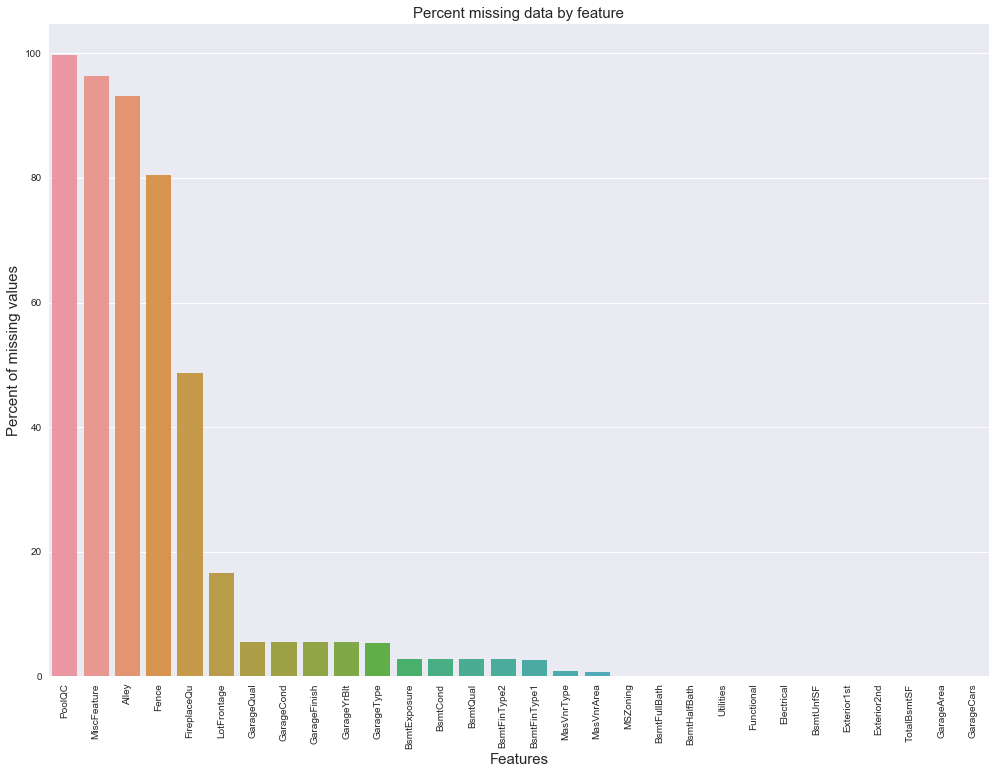

In [120]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=entire_data_na.index, y=entire_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Data Imputation
We will resolve missing data with data imputation so we dont have to lose original data

In [121]:
# Imputing missing values
entire_data["PoolQC"] = entire_data["PoolQC"].fillna("None")
entire_data["MiscFeature"] = entire_data["MiscFeature"].fillna("None")
entire_data["Alley"] = entire_data["Alley"].fillna("None")
entire_data["Fence"] = entire_data["Fence"].fillna("None")
entire_data["FireplaceQu"] = entire_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.


In [122]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
entire_data["LotFrontage"] = entire_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [123]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    entire_data[col] = entire_data[col].fillna('None')

In [124]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    entire_data[col] = entire_data[col].fillna(0)

In [125]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    entire_data[col] = entire_data[col].fillna(0)

In [126]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    entire_data[col] = entire_data[col].fillna('None')

In [127]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
entire_data["MasVnrType"] = entire_data["MasVnrType"].fillna("None")
entire_data["MasVnrArea"] = entire_data["MasVnrArea"].fillna(0)

In [128]:
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
entire_data['MSZoning'] = entire_data['MSZoning'].fillna(entire_data['MSZoning'].mode()[0])

In [129]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
entire_data = entire_data.drop(['Utilities'], axis=1)

In [130]:
# Functional : data description says NA means typical
entire_data["Functional"] = entire_data["Functional"].fillna("Typ")

In [131]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
entire_data['Electrical'] = entire_data['Electrical'].fillna(entire_data['Electrical'].mode()[0])

In [132]:
# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
entire_data['KitchenQual'] = entire_data['KitchenQual'].fillna(entire_data['KitchenQual'].mode()[0])


In [133]:
# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
entire_data['Exterior1st'] = entire_data['Exterior1st'].fillna(entire_data['Exterior1st'].mode()[0])
entire_data['Exterior2nd'] = entire_data['Exterior2nd'].fillna(entire_data['Exterior2nd'].mode()[0])


In [134]:
# SaleType : Fill in again with most frequent which is "WD"
entire_data['SaleType'] = entire_data['SaleType'].fillna(entire_data['SaleType'].mode()[0])


In [135]:
# MSSubClass : Na most likely means No building class. We can replace missing values with None
entire_data['MSSubClass'] = entire_data['MSSubClass'].fillna("None")


In [136]:
#Check remaining missing values if any 
entire_data_na = (entire_data.isnull().sum() / len(entire_data)) * 100
entire_data_na = entire_data_na.drop(entire_data_na[entire_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :entire_data_na})
missing_data.head()

,Missing Ratio


As we can see we no longer have missing data in the dataset. Now we are ready to do futher exploration. Now we will deal with skewness of data

In [137]:
entire_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,Normal,WD,0,Pave,5,796.0,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,Normal,WD,0,Pave,7,1686.0,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,Normal,WD,0,Pave,7,1107.0,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,Abnorml,WD,0,Pave,8,952.0,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,Normal,WD,0,Pave,5,991.0,0,1939,1950,2008


# Dealing with categorical features

In [138]:
#MSSubClass=The building class
entire_data['MSSubClass'] = entire_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
entire_data['OverallCond'] = entire_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
entire_data['YrSold'] = entire_data['YrSold'].astype(str)
entire_data['MoSold'] = entire_data['MoSold'].astype(str)


In [139]:
# Label encoding some categorical variable that may contian information in their ordering set

In [140]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(entire_data[c].values)) 
    entire_data[c] = lbl.transform(list(entire_data[c].values))

# shape        
print('Shape all_data: {}'.format(entire_data.shape))

Shape all_data: (2917, 78)


In [141]:
# Adding total sqfootage feature 
entire_data['TotalSF'] = entire_data['TotalBsmtSF'] + entire_data['1stFlrSF'] + entire_data['2ndFlrSF']


We see that SalePrice and GrLivArea which is the above grade(ground)living area square feet has a positive linear relationship which means as the mumber of square feet of GrLivArea increase the SalePrice increases as well.Now lets take a look at the relation between 'TotalBsmtSF' and 'SalePrice'

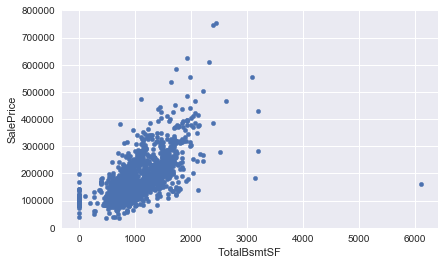

In [142]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


We will now take at a relationship with categorical features

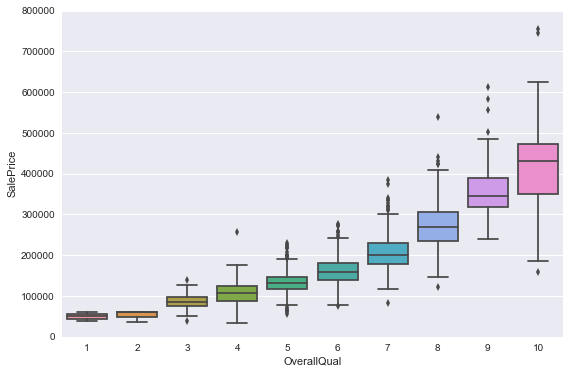

In [143]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

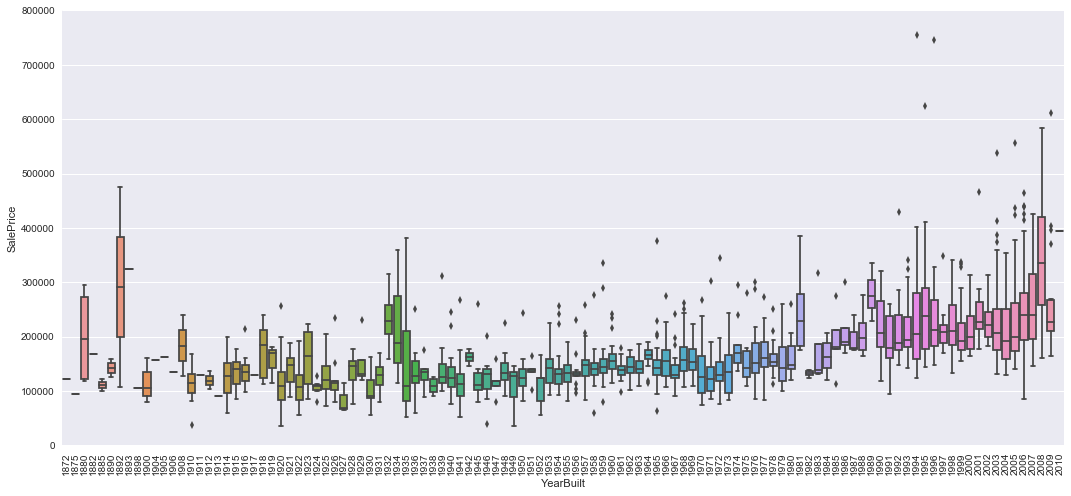

In [144]:
var = 'YearBuilt'
data = pd.concat([house_train_data['SalePrice'], house_train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We have analyzed four variables and the dataset has alot more other variable that we need to analyzed. The strategy we are going to use here is identify feature variables that needs to be considered for further analysis. We are going to use feature engineering to identify the qualifying feature variable for futher analysis.We will now explore the data using correlation matrix, SalePrice correlation matrix and use scatter plots between the most correlated variables

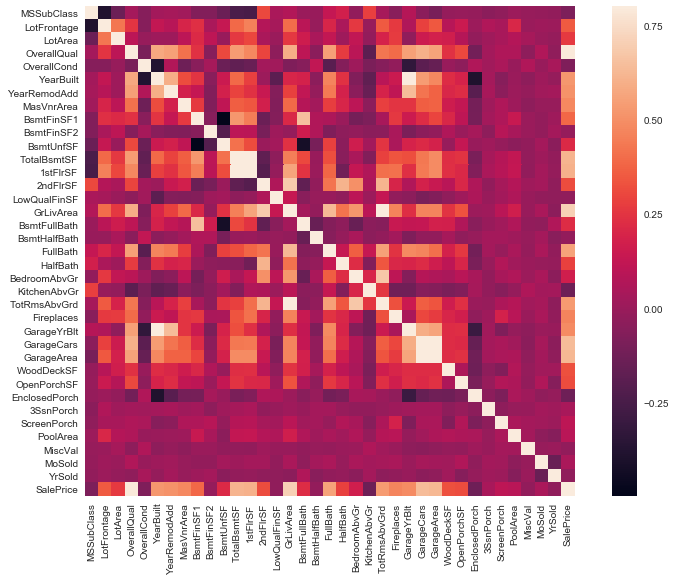

In [145]:
#correlation matrix
corrmat = house_train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Look at the correlation heatmap we can draw attention on 'TotalBsmtSF' and "1stFlrSF" variables.We see significant correlation between these variables. There is a strong correlation that indicate a multicollinearity situation and this case applies to the variable 'GarageX'. When we investigate more on these variables they almost give the same information. Heatmaps are great for detecting this kind of situations.Lets dig in and evaluate SalePrice with 'GrLivArea','TotalNsmtSF'and 'OverallQual'

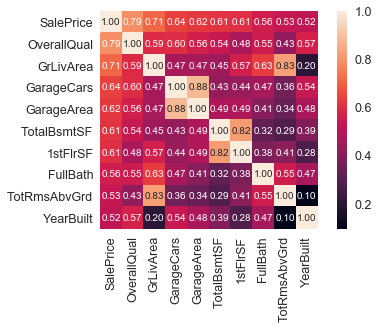

In [146]:
# This is a 'SalePrice' correlation matrix a zoomed in heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


We see from the heatmap above that 'GarageCars' and 'GarageArea' are some of the most correlated variables. The reason being the number of cars that fit into the garage is a consequence of the garage area.Therefore, we will keep 'GarageCars'since it has the most correlation to 'SalePrice'and we will get rid of 'GarageArea'.Between 'TotalBsmtSF' and '1stFloor'the same case is happening here so we will keep 'TotalBsmtSF'.

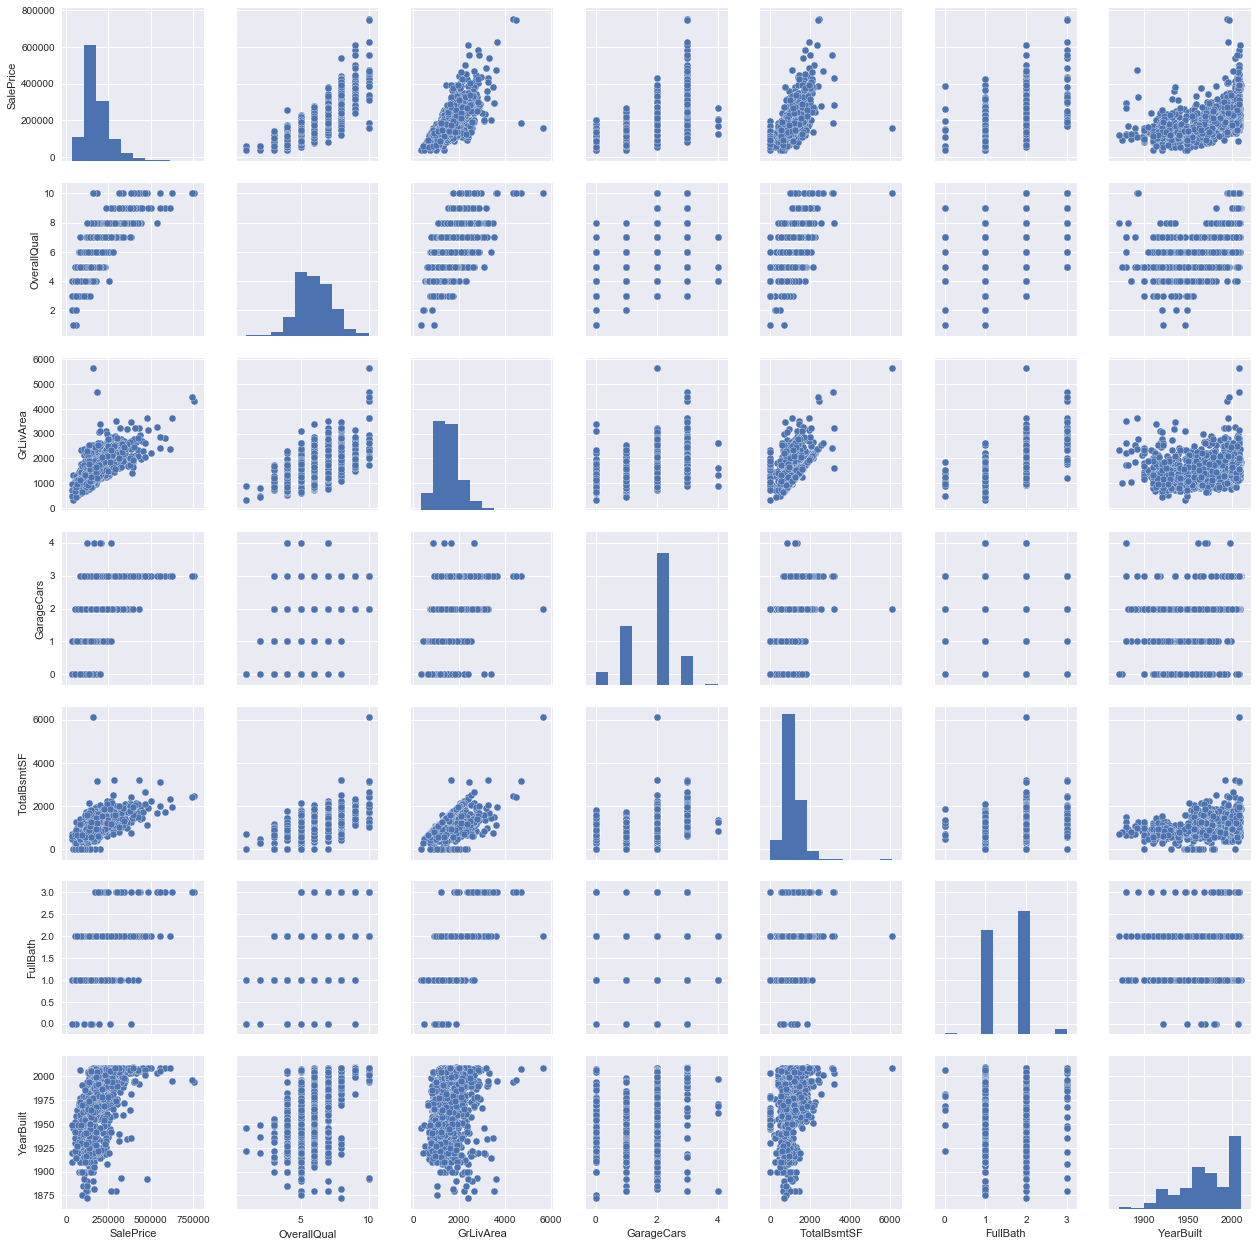

In [147]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_train_data[cols], size = 2.5)
plt.show();

# Data Normality

The point here is to test 'SalePrice' in a very lean way. In doing so we will be paying attention to histogram: kurtosis and skewness and normal probability plot which means data distribution should closely follow the diagonal that represents the normal distribution

In [148]:
import scipy.stats as stats
from scipy.stats import norm


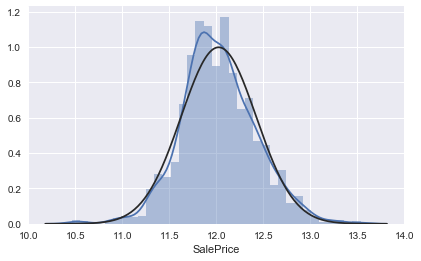

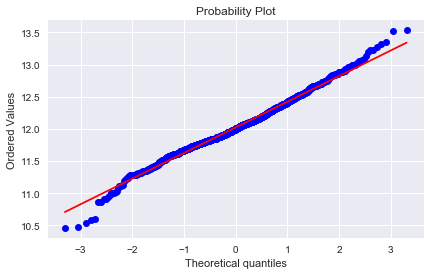

In [149]:
#histogram and normal probability plot
sns.distplot(training_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)

We see that the predictive variable 'SalePrice' is normal. We also see 'peakedness', positive skewness and not following the diagonal line. Lets using log transformations to resolve positive skewness.

In [150]:
#applying log transformation
training_data['SalePrice'] = np.log(training_data['SalePrice'])

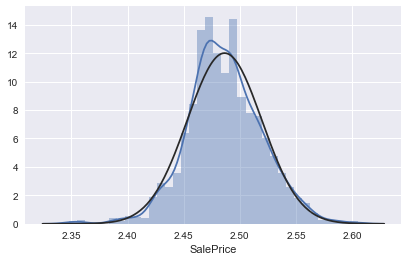

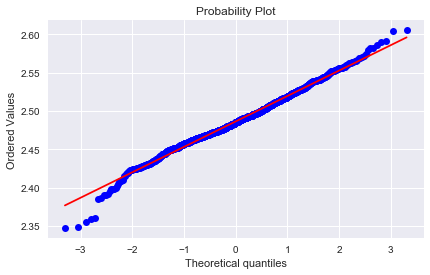

In [151]:
#transformed histogram and normal probability plot
sns.distplot(training_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['SalePrice'], plot=plt)

Perfect problem resolved. Now lets take look at the variable 'GrLivArea'

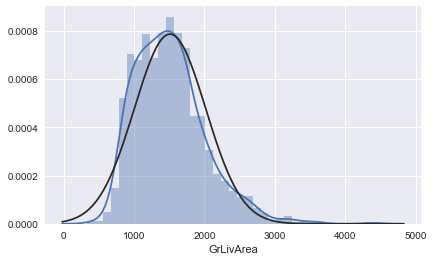

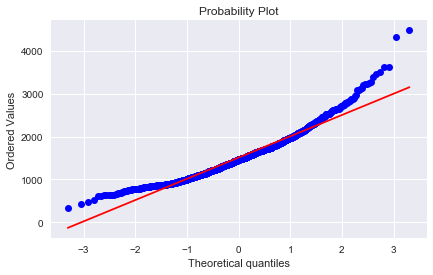

In [152]:
#histogram and normal probability plot
sns.distplot(training_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['GrLivArea'], plot=plt)


In [153]:
#data transformation
training_data['GrLivArea'] = np.log(training_data['GrLivArea'])


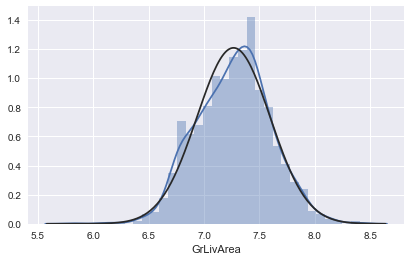

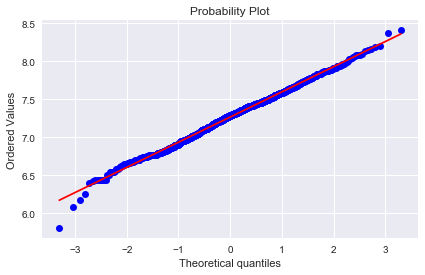

In [154]:
#transformed histogram and normal probability plot
sns.distplot(training_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['GrLivArea'], plot=plt)


We will take look at variables 'TotalBsmSF','HasBsmt'

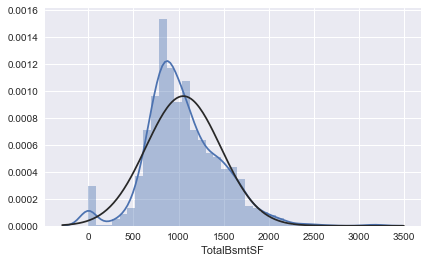

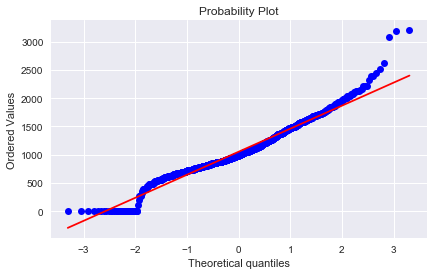

In [155]:
#histogram and normal probability plot
sns.distplot(training_data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data['TotalBsmtSF'], plot=plt)

We have alot of zeros in the variable and we cant use log transformation. To resolve this problem of zeros skewing the data. We will create a variable that can get the effect of having or not having basement() binary variable). after that we will do a log transformation to all the non-zero observations, ignoring those with value zero. Doing so will not lose the effect of having or not  basement.

In [156]:
#if area>0 it gets 1, for area==0 it gets 0
training_data['HasBsmt'] = pd.Series(len(training_data['TotalBsmtSF']), index=training_data.index)
training_data['HasBsmt'] = 0 
training_data.loc[training_data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [157]:
#transform data
training_data.loc[training_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(training_data['TotalBsmtSF'])

C:\Users\abelc\AppData\Local\Enthought\Canopy32\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


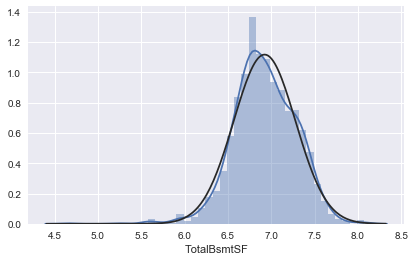

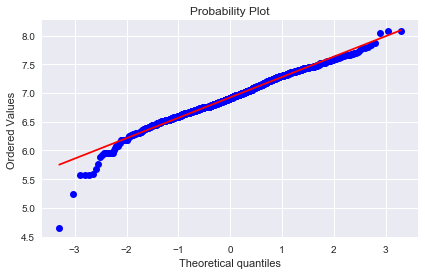

In [158]:
#histogram and normal probability plot
sns.distplot(training_data[training_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_data[training_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Testing Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

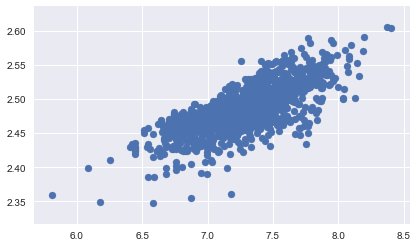

In [159]:
#scatter plot
plt.scatter(training_data['GrLivArea'], training_data['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

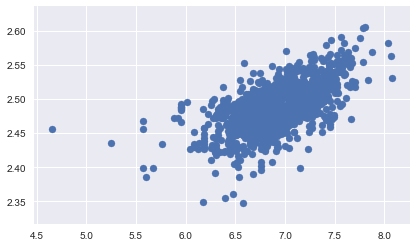

In [160]:
#scatter plot
plt.scatter(training_data[training_data['TotalBsmtSF']>0]['TotalBsmtSF'], training_data[training_data['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [161]:
# Creating Dummy Variables
entire_data.shape

(2917, 79)

In [162]:
X = entire_data.iloc[:len(Y), :]

X_sub = entire_data.iloc[len(Y):, :]

In [163]:
X.shape,Y.shape, X_sub.shape

((1458, 79), (1458,), (1459, 79))

In [164]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = .33, random_state = 0)

In [165]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((976, 79), (976,), (482, 79), (482,))